In [2]:
%load_ext itikz

(content:design)=
# Design of Experiments and Projects in Speech Technology

Projects in speech processing or technology are, in their structure, relatively similar to generic engineerning projects and would thus be covered by usual courses in project planning, like the one on [Coursera](https://www.coursera.org/learn/uva-darden-project-management). Thinking about projects from the perspective of speech processing however specifies in more detail *how* requirements and experiments are chosen. In addition, this section outlines a generic workflow for all experiments in speech processing. The format applies to all projects in speech and language technology, but has most value with projects where the output quality is evaluated by humans, like when using [subjective quality evaluation](content:subjectiveevaluation).


The overall generic process is illustrated below. The ideal (but highly improbable) sequence of events is to go straight down step by step. A much more likely process, and one which usually improves the quality of the end-result much more, is to iterate between, for example, implementation and testing. In the figure, the more typical and frequent iteration loops are illustrated with darker grays, while less likely paths are lighter grays.

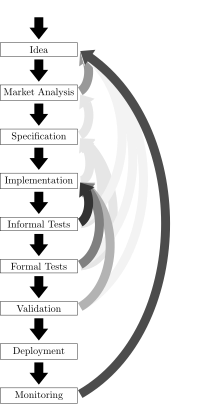

In [132]:
%%itikz --temp-dir  --file-prefix anonsolve 
\documentclass[tikz]{standalone}
\usepackage[utf8]{inputenc}
\usepackage{tikz}
\usepackage{verbatim}


\usepackage{pgfplots}
\DeclareUnicodeCharacter{2212}{−}
\usepgfplotslibrary{groupplots,dateplot}
\usetikzlibrary{patterns,shapes.arrows}
\usetikzlibrary {fit} 
\usetikzlibrary{shapes.geometric,positioning}
\usetikzlibrary{bending}
\pgfplotsset{compat=newest}

\usetikzlibrary{arrows.meta}
\usetikzlibrary{arrows}

\tikzstyle{arrow}   = [solid, line width = 9pt, -{Triangle[width = 18pt, length = 12pt]}, color = black, shorten >= 3pt, shorten <= 3pt]

\begin{document}


\begin{tikzpicture}[scale=1,transform shape]
    \node[] (null) {\parbox{2.5cm}{\centering\phantom{Null}}};
    \node[draw,below=of null] (idea) {\parbox{2.5cm}{\centering Idea}};
    \node[draw,below=of idea] (market) {\parbox{2.5cm}{\centering Market Analysis}};
    \node[draw,below=of market] (spec) {\parbox{2.5cm}{\centering Specification}};
    \node[draw,below=of spec] (coding) {\parbox{2.5cm}{\centering Implementation}};
    \node[draw,below=of coding] (test1) {\parbox{2.5cm}{\centering Informal Tests}};
    \node[draw,below=of test1] (test2) {\parbox{2.5cm}{\centering Formal Tests}};
    \node[draw,below=of test2] (test3) {\parbox{2.5cm}{\centering Validation}};
    \node[draw,below=of test3] (deploy) {\parbox{2.5cm}{\centering Deployment}};
    \node[draw,below=of deploy] (monitor) {\parbox{2.5cm}{\centering Monitoring}};
    
    \draw[arrow] (null) -- (idea);
    \draw[arrow] (idea) -- (market);
    \draw[arrow] (market) -- (spec);
    \draw[arrow] (spec) -- (coding);
    \draw[arrow] (coding) -- (test1);
    \draw[arrow] (test1) -- (test2);
    \draw[arrow] (test2) -- (test3);
    \draw[arrow] (test3) -- (deploy);
    \draw[arrow] (deploy) -- (monitor);
    
    \draw[arrow,color=black!40!white,out=30,in=-30] (market.east) to (idea.east);
    \draw[arrow,color=black!10!white,out=30,in=-30] (spec.east) to (market.east);
    \draw[arrow,color=black!10!white,out=5,in=-30] (coding.east) to (spec.east);
    \draw[arrow,color=black!10!white,out=5,in=-30] (test1.east) to (spec.east);
    \draw[arrow,color=black!10!white,out=5,in=-30] (test2.east) to (spec.east);
    \draw[arrow,color=black!5!white,out=30,in=-30] (test3.east) to (idea.east);
    \draw[arrow,color=black!5!white,out=30,in=-30] (test2.east) to (idea.east);
    \draw[arrow,color=black!5!white,out=30,in=-30] (test1.east) to (idea.east);
    \draw[arrow,color=black!30!white,out=30,in=-30] (test3.east) to (coding.east);
    \draw[arrow,color=black!50!white,out=30,in=-30] (test2.east) to (coding.east);
    \draw[arrow,color=black!80!white,out=30,in=-30] (test1.east) to (coding.east);
    \draw[arrow,color=black!70!white,out=30,in=-30] (monitor.east) to (idea.east);
    
\end{tikzpicture}


\end{document}

## Idea
Everything starts with an idea of a problem or of a feature which could be improved or introduced.

## Market Analysis
Before investing effort in developing a new feature or solving a problem, it is essential to know whether anyone cares. *Why is this feature important? How would the outcome of this project improve the lives of our users? Is it something that we can sell?*

If the answer is *no*, this is not important, then we either stop or go back to ideation.

## Specification
In specification, we choose all the relevant parameters of the project, including
- *target group*; who is this feature designed for?
- *metrics*; how is success defined?
- *methods*; what is the principal approach?
- *baseline*; if we are improving a feature, what is the reference quality level? 
- *dataset*; what data can we use to train models and evaluate performance?
- *augmentation*; if/when supply of data is finite, how can we artifically increase the training set?
- *requirements*; what are required properties of a solution?
- *environment (implementation)*; what hardware and software platforms are we going to use?
- *enironment (use)*; in what physical environments is the service used?
- etc.

The market analysis should give answers to these questions, but if not, then we have to redo that analysis.

## Implementation
Finally we can start programming. 

> **Expert tip:** Start by implementing the smallest possible program which gives sensible output. For example, if the desired application produces sound as output, implement something which plays a sound. Test it (informally). Starting adding features in very small increments, and constantly check that output remains sensible.</i>

## Informal testing and validation
Hardly ever has anyone programmed something such that it would work on the first try. Programming is thus an iterative process where we implement something and test it. The faster we can get useful test results, the faster we can go back to fixing problems. It is therefore essential that the first level tests are fast to run and inexpensive.

### Sanity checks / validation
- When implementing machine learning, typically you want to observe that the value of the loss function converges to a sensible value. 
- Plot a waveform or spectrogram of the output and check whether it looks as expected.
- If the program/function outputs sounds, **Listen to the output! This is important!** A very large proportion of bugs can be observed by listening to the output. You will also quickly learn to characterize performance qualitatively. This guides you in further development.

### Small-scale tests
- Run [objective quality tests](content:objectiveevaluation), and/or [other performance measures](content:otherperformance) and make quick [analyses of results](content:analysisofresults).

### and then
Typically, you will find a problem or something to improve already in informal testing, such that you can return to fixing that (implementation). 

After a sufficient number of iterations, when the quality is sufficiently good, you can proceed to formal quality testing.

## Formal quality test
If informal tests suggest that performance is good, you are ready to evaluate performance with a more rigorous testing procedure. Typically you would then want to compare performance to the baseline method(s), such as a previous version(s) of the software or competing algorithms. With objective tests, you can then evaluate performance for large datasets. When applicable, you can also evaluate subjective performance with small-scale, *formal* [listening tests](content:subjectiveevaluation). In both cases, at this stage, you would already need to make proper statistical [analyses of results](content:analysisofresults). 

A typical scenario is that you would ask your colleagues or friends to take a 15min listening test. That is something you can do perhaps every second week, or once a month, if you want to stay in good terms with your friends. It does get boring for the subjects in the long run.

Formal tests are used to guide further development. When there is not enough evidence of sufficient performance, we have to go back to improving the implementation. 

> **Expert tip:** It can be very informative to extract samples of the data which have the worst objective performance measures. We can then try to manually and perceptually evaluate such samples to find out the reason for the poor quality. This is especially efficient for detection of bugs which occur rarely.

## Validation

In any high-stakes applications, we need solid evidence that proposed functionalities work as advertised. To gain such evidence we use *validation tests*. Where the service outputs sounds (like speech coding or enhancement), typically such tests entail subjective listening tests with a larger pool of listeners (hunderds or thousands of listeners). When the functionality is part of a user-interface, we also need tests where users use the service. Such tests are standard in user-interface design and the main difference to subjective listening tests is that use-tests typically need to be tailored specifically to each use-case. Consequently, the amount of users that can be evaluated is an order of magnitude smaller. 

In speech analysis applications, where the output is not sound, but an *analysis result*, we obviously need objective performance measures. This is typically very similar to the loss function of the corresponding machine learning problem. The main difference between training/testing vs. validation is then that the validation dataset should be *previously unseen* and sufficiently large. 

In any case, results of validation tests have to be analysed with [statistical tools](content:analysisofresults), to determine extent of statistical confidence we can place on the results. 

Once we have sufficient evidence that the proposed method has sufficient/high quality, we can proceed to deployment. 

## Deployment

The developed software or service is then taken into use in a real-world platform.

## Monitoring

Once the software or service is in use, we should continuously monitor performance. We can, for example, periodically test objective perceptual quality, to detect software bugs or failing hardware. We can analyze usage patterns to learn which functionalities are popular among users. Such monitoring is central in understanding the needs of customers, which in turn feeds into new ideas of improvement.